<a href="https://colab.research.google.com/github/Kiduhu/Cavin/blob/main/Comparison%20for%20ML%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apple Inc is an American hardware and software developer. It is majorly a technology company that develops and sells computers,smartphones and othe relectronics. I ts solely responsible for the operatin system IOS .

I n the data below I apply machine learning techniques to analyze and identify the best predictor.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('/content/apple_stock_data.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-03-30,608.77,610.56,597.94,599.55,26050900,599.55
1,2012-03-29,612.78,616.56,607.23,609.86,21668300,609.86
2,2012-03-28,618.38,621.45,610.31,617.62,23385200,617.62
3,2012-03-27,606.18,616.28,606.06,614.48,21628200,614.48
4,2012-03-26,599.79,607.15,595.26,606.98,21259900,606.98


In [6]:
# gives the summary of the type of data we are dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6953 non-null   object 
 1   Open       6953 non-null   float64
 2   High       6953 non-null   float64
 3   Low        6953 non-null   float64
 4   Close      6953 non-null   float64
 5   Volume     6953 non-null   int64  
 6   Adj Close  6953 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 380.4+ KB


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [9]:
# checking for missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


# Exploratory Data Analysis and Data Visualization

In [12]:
# Gives a representation of the measures of central tendency i.e. the mean, median, standard deviation and the quantile
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,6953.000000,6953.000000,6953.000000,6953.000000,6.953000e+03,6953.000000
mean,74.096741,75.184099,72.929042,74.084533,1.459273e+07,53.733934
std,89.246066,90.051593,88.315136,89.270194,1.345270e+07,96.711649
min,12.880000,13.190000,12.720000,12.940000,8.880000e+04,1.650000
25%,26.370000,27.000000,25.870000,26.370000,5.989600e+06,7.890000
50%,41.250000,42.000000,40.500000,41.250000,1.021520e+07,10.630000
75%,69.510000,71.000000,68.100000,69.590000,1.849880e+07,39.810000
max,618.380000,621.450000,610.310000,617.620000,2.650690e+08,617.620000


In [13]:
df.set_index('Date', inplace=True)

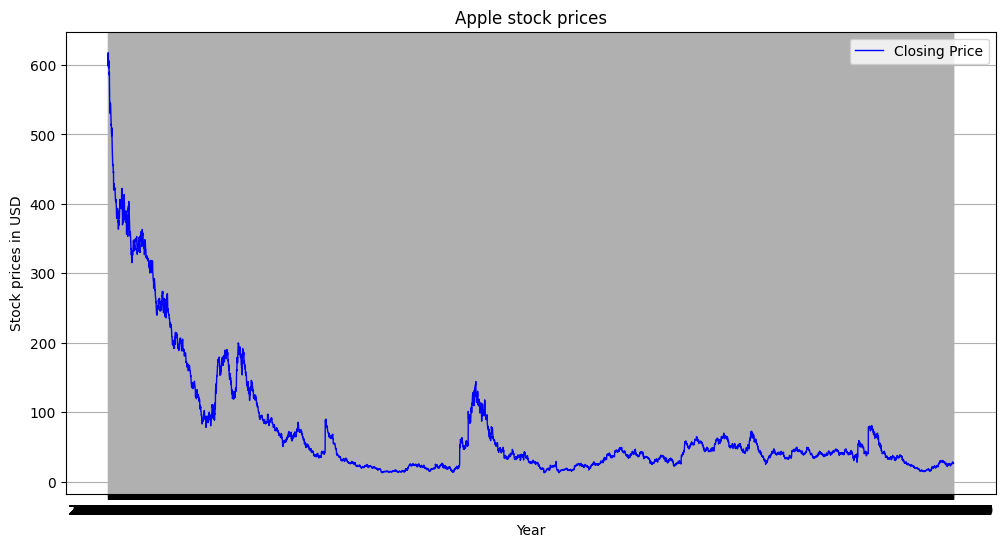

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['Close'], label='Closing Price', color='blue', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Stock prices in USD')
plt.title('Apple stock prices')
plt.legend()
plt.grid(True)
plt.show()

# Machine learning
## Applying


*   Random Forest
*   Linear regression
*   SVR
* XGBregressor



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [29]:
# Feature Engineering
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['RSI'] = 100 - (100 / (1 + (df['Close'].diff(1).clip(lower=0).rolling(window=14).mean() /
                                 df['Close'].diff(1).clip(upper=0).abs().rolling(window=14).mean())))

In [31]:
# Drop NaN values
df.dropna(inplace=True)

In [32]:
# Define features and target
X = df[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50', 'RSI']]
y = df['Close']

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(kernel='rbf'),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [43]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R²': r2}
results_df= pd.DataFrame(results).T
results_df= results_df.sort_values(by='R²', ascending=False)
results_df

,MSE,MAE,R²
Linear Regression,0.720394,0.506240,0.999902
Random Forest,1.527546,0.669514,0.999792
XGBoost,2.849522,0.860081,0.999612
Support Vector Machine,393.062636,5.501799,0.946519


In [44]:
# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  R²: {metrics['R²']}")
    print()

Linear Regression:
  MSE: 0.720394411278475
  MAE: 0.506240142535063
  R²: 0.9999019806894267

Random Forest:
  MSE: 1.5275463991817486
  MAE: 0.6695139029688628
  R²: 0.9997921568482869

Support Vector Machine:
  MSE: 393.0626357510332
  MAE: 5.501798742036131
  R²: 0.9465185626578113

XGBoost:
  MSE: 2.8495215533025116
  MAE: 0.8600813576313655
  R²: 0.999612284418444



<ipython-input-51-2925777ccb2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R²'],data=results_df,palette='Greens')


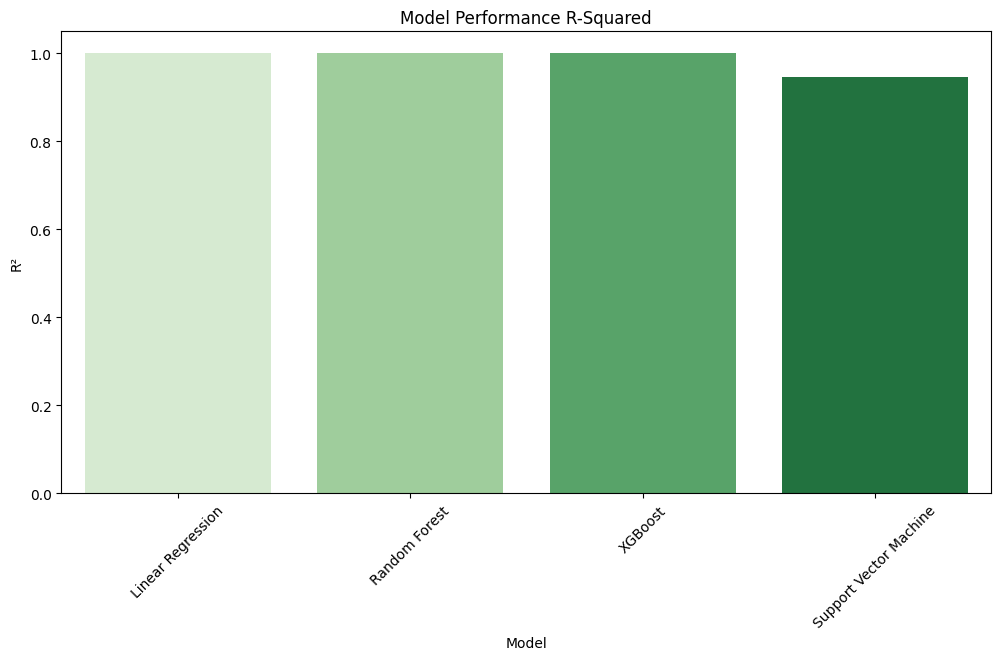

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['R²'],data=results_df,palette='Greens')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('R²')
plt.title('Model Performance R-Squared')
plt.show()

<ipython-input-53-86582f60f327>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['MSE'],data=results_df,palette='Reds')


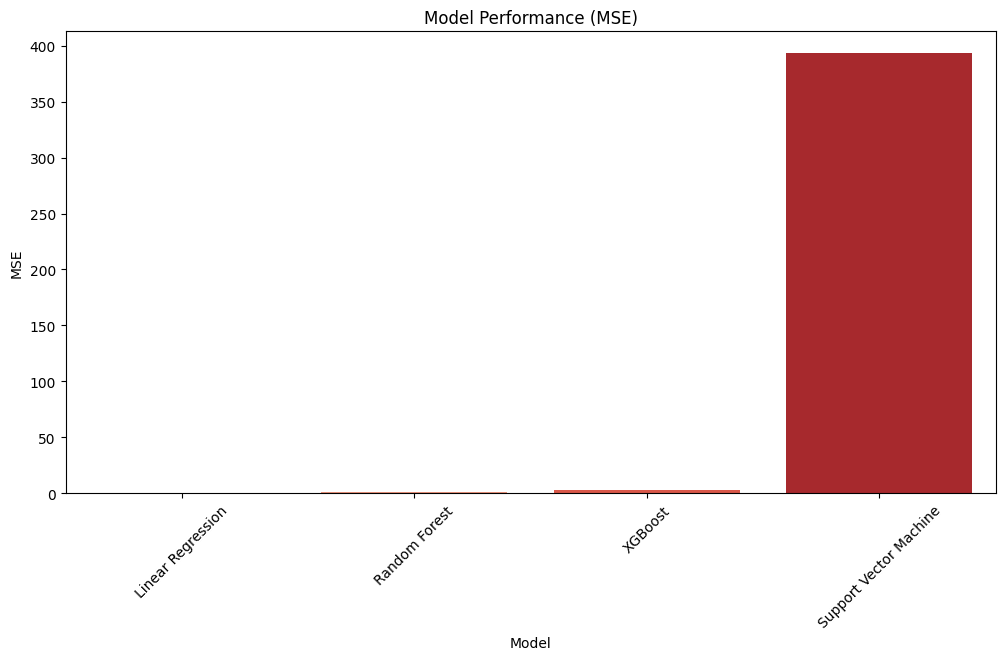

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df['MSE'],data=results_df,palette='Reds')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Performance (MSE)')
plt.show()

In [54]:
best_model=results_df.loc[results_df['R²'].idxmax()]
print('Best Model')
print(best_model)


Best Model
MSE    0.720394
MAE    0.506240
R²     0.999902
Name: Linear Regression, dtype: float64


Best model from the results to use is the linear regression model. **It provises the lowest error**